<div class="alert block alert-info alert">

# <center> Scientific Programming in Python

## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> Neural Network using NumPy

## <center> A Feed-Forward NN (i.e., multilayer perception)
**Original concept**: Justin Johnson at https://sebarnold.net/tutorials/beginner/pytorch_with_examples.html


<hr style="border:2px solid gray"></hr>

<figure>
  <center>
    <img src="00_images/31_machine_learning/nn_perceptron_example_nodes.png" style="width: 500px; margin: 0 0px;"/><br>
    <img src="00_images/31_machine_learning/nn_perceptron_example.png" style="width: 1000px; margin: 0 0px;"/>
    <figcaption style="margin-top: 10px; color: black; font-style: italic;">
          <b>Figure 1</b>: Illustration of the NN that we will create (top). The NumPy details of this NN (bottom).<br>
    </figcaption>
  </center>
</figure>

#### Architecture
- "Fully connected" network (i.e., due to the $W1 \cdot X1 + B1$ matix mathematics)
- <font color='DodgerBlue'>**1 Input** layer</font> (The shape of these tensors is determined by the matrix mathematics.)
    - **`X1`**: **2 input samples** (e.g., <font color='DodgerBlue'>2 houses</font>) with features
        - 10 features (e.g., number of bedrooms, number of bathrooms, size, etc.)
            - Initial values: toy data (see below)
    - **`W1`**:**10 sets** of **3 weighting factors**
        - Needed due to <font color='DodgerBlue'>matrix dot product</font> between the **weights** and **input data:**
        - $W1 \cdot X1$
        - Considering the shape of these matrices
        - $W1 \cdot X1 = ({\color{blue}m}, n) \cdot (n, {\color{red}k}) = ({\color{blue}m}, {\color{red}k})$
            - (<font color='DodgerBlue'>2</font>, 10) $\cdot$ (10, <font color='red'>3</font>) = (<font color='DodgerBlue'>2</font>, <font color='red'>3</font>)
        - initial values: randomly set
    - **`B1`**: 2 sets of 3 biases (due to <font color='DodgerBlue'>matrix additions</font>)
        - initial values: 0.0

<br>

- <font color='DodgerBlue'>**1 Hidden** layer</font> (actually <font color='DodgerBlue'>2 layers</font>: **`X2`** and **`Y1`**)
    - transformer function (data combination and reduction: <font color='DodgerBlue'>10 $\rightarrow$ 2 features</font>)
    - activation function (adding non-linearity)

<br>

- <font color='DodgerBlue'>**1 Output** layer</font> (**`Y2`**)
    - 1 target feature (e.g., house price)
    - 2 predictions - 1 for each of the input houses

<br>

#### Transfer Step - Purpose of Weights and Biases

- **Weights**: adjust the <font color='DodgerBlue'>connection **strengths**</font> between neurons

- **Biases**: adjust the <font color='DodgerBlue'>**neurons**</font> themselves (**increasing** or **decreasing** their <font color='DodgerBlue'>**outputs**</font>).
    - In effect, they change how the activation function manipulates each neuron.

<br>

#### Needed Mathematics
- Linear algebra (matrices)
- Calculus (derivatives)

<hr style="border:2px solid gray"></hr>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Gradient Descent/Optimization

Optimization Problem:
- follow the negative of the gradient (i.e., slope; the **first derivative**)
    - thus, <font color='DodgerBlue'>move in the direction of the steepest descent</font>

**Partial derivative** with respect to the **$\mathbf{x}$ variable**:
\begin{equation}
    \mathbf{\nabla_x = \frac{\partial}{\partial x}}
\end{equation}

The gradient descent equation is then defined as:

\begin{equation}
    \mathbf{x_{n+1} = x_n - \alpha \nabla_x{y(x)}}
\end{equation}
where <font color='DodgerBlue'>$\mathbf{x_n}$</font> is **current x value** (e.g., initial) and <font color='DodgerBlue'>$\mathbf{\alpha}$</font> is the **step size** (i.e., **learning rate**), and <font color='DodgerBlue'>$\mathbf{x_{n+1}}$</font> is the **new x value**.

<br><br>

#### <font color='DodgerBlue'>Example</font>: Gradient descent for a simple one-dimensional function
$$\mathbf{y(x) = x^{2}}$$
$$\mathbf{\frac{\partial \ y(x)}{\partial x} = 2x}$$

Create 2 callable functions:
1. <font color='DodgerBlue'>Function 1</font>:
    - $\mathbf{y(x) = x^2}$ and
    - $\mathbf{\frac{\partial }{\partial x}y(x) = 2x}$ (i.e., the gradient)
2. <font color='DodgerBlue'>Function 2</font>:
    - **Gradient descent**

In [2]:
def function_x_sqrd(x_value: float) -> (float, float):
    ''' Evaluate y(x) = x^2 and its derivative.

        Args
            x_value: input value

        Returns
            y_value: y(x) value evaluated at x_value
            gradient: derivative value evaluated at x_value
    '''
    y_value = x_value**2
    gradient = 2*x_value

    return y_value, gradient


def gradient_descent(function: callable, x_n: float, learning_rate: float) -> (float, float):
    ''' Gradient descent algorithm.

        x_n+1 = x_n - learning_rate * gradient

        The learning rate is also known as the step size.

        Args
            function: a 1-dimensional mathematical function that returns two items, and
                      whose second item should be a gradient value.

            x_n: input value
            step_size: how big of a move to take (i.e., learning rate).

        Return
            x_n1: the new x value.
            gradient: gradient value determined at the x_n input.
    '''
    _, gradient = function(x_n)
    x_n1 = x_n - learning_rate * gradient

    return x_n1, gradient

- **Initialize objects**:
    - The **initial guess** (and the initial gradient - needed for entering the `while` loop below).
    - The stepsize (**learning rate**) for the gradient descent.
    - A **convergence criteria** for stopping the optimization.
    - A dictionary to collect results.

- <font color='dodgerblue'>**Run** the $1^{st}$ gradient descent</font>, and collect result. 

In [3]:
x_guess = 2.0
learning_rate = 0.1
convergence_criteria = 0.01

y_value, gradient = function_x_sqrd(x_value=x_guess) ## the initial gradient

iteration_dict = {0: [x_guess, y_value, gradient]}

iteration_dict

{0: [2.0, 4.0, 4.0]}

- Perform <font color='dodgerblue'>**gradient optimization**</font> until the **convergence criteria** is **acheived**.

In [4]:
iteration = 0

while gradient > convergence_criteria:
    iteration += 1

    new_x, gradient = gradient_descent(function=function_x_sqrd, x_n=x_guess, learning_rate=learning_rate)
    
    new_y, new_grad = function_x_sqrd(new_x)

    iteration_dict[iteration] = [new_x, new_y, new_grad]

    x_guess = new_x # updated guess

iteration_pd = pd.DataFrame.from_dict(iteration_dict, orient='index', columns=['x', 'y(x)', 'gradient'])
iteration_pd

,x,y(x),gradient
0,2.000000,4.000000,4.000000
1,1.600000,2.560000,3.200000
2,1.280000,1.638400,2.560000
3,1.024000,1.048576,2.048000
4,0.819200,0.671089,1.638400
5,0.655360,0.429497,1.310720
6,0.524288,0.274878,1.048576
7,0.419430,0.175922,0.838861
8,0.335544,0.112590,0.671089
9,0.268435,0.072058,0.536871


- Visualize the optimization iteration:

Text(0, 0.5, 'y(x)')

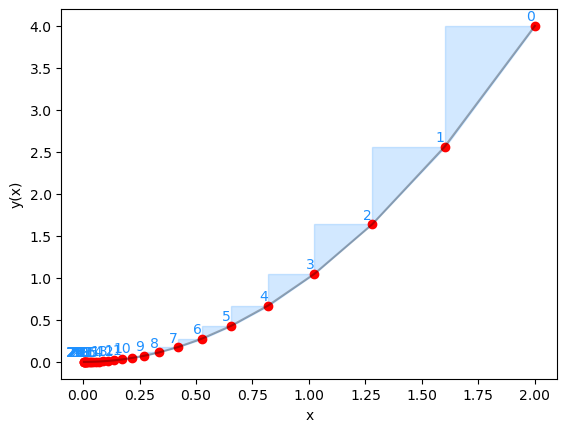

In [5]:
for i in range(len(iteration_pd) - 1):
    x_curr, y_curr = iteration_pd.iloc[i]['x'], iteration_pd.iloc[i]['y(x)']
    x_next, y_next = iteration_pd.iloc[i+1]['x'], iteration_pd.iloc[i+1]['y(x)']

    triangle_x = [x_curr, x_next, x_next]
    triangle_y = [y_curr, y_curr, y_next]

    plt.fill(triangle_x, triangle_y, color='DodgerBlue', alpha=0.2)

plt.plot(iteration_pd['x'], iteration_pd['y(x)'], color='black', alpha=0.3)
plt.scatter(iteration_pd['x'], iteration_pd['y(x)'], color='red', label='iteration')

## Annotation
for index, row in iteration_pd.iterrows():
    plt.text(row['x'] + 0.0, row['y(x)'] + 0.03, str(index),
             fontsize=10, color='DodgerBlue', ha='right', va='bottom')  

plt.xlabel(xlabel='x')
plt.ylabel(ylabel='y(x)')

<hr style="border:2px solid gray"></hr>

## Fully-Connected NN

#### <font color='dodgerblue'>Activation Function</font>

**Purpose**
- introduce **non-linearity** into the system

Without activation functions, the **nodes are linearly connected** due to the **matrix multiplication**.

If all nodes are computed using the <font color='Red'>**summation of linear functions**</font> (i.e., the transfer functions), then the end <font color='Red'>**prediction**</font> will be <font color='Red'>**linearly connected to the input**</font>.

 
**Source**:
- https://towardsdatascience.com/the-importance-and-reasoning-behind-activation-functions-4dc00e74db41

<br>

Define the <font color='DodgerBlue'>**activation function**</font>: a **rectified linear unit** (<font color='DodgerBlue'>ReLU</font>)
- https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

\begin{equation}
    ReLU(x) = max(0, x) = \frac{x + |x|}{2} =
    \begin{cases}
        x,& \text{if } x>1\\
        0,              & \text{otherwise}
    \end{cases}
\end{equation}


**Visualize**: What does the ReLU function look like:

In [6]:
def relu(x: np.array, bias: float=0.0) -> np.array:
    ''' A rectified linear unit function.

        Args:
            x:    The input array,
            bias: A scalar bias value to be added to each element of `x`
                       (ie., shifts the plot on x axis)

        Returns:
            Values of `x` where all negative values (after adding bias)
                have been replaced by 0, while positive values remain unchanged.
    '''
    return np.maximum(0, x + bias)

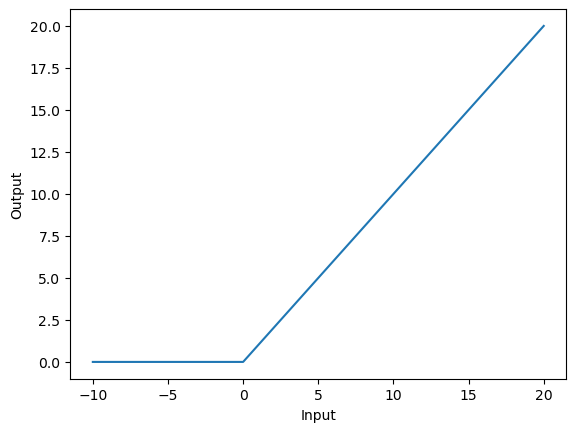

In [7]:
def plot_relu(bias:float):
    '''Plot the ReLU activation function.'''
    x = np.linspace(-10, 20, 100)

    relu_x = relu(x=x, bias=bias)  

    plt.plot(x, relu_x)
    plt.xlabel('Input')
    plt.ylabel('Output')

plot_relu(bias=0.0)

#### <font color='dodgerblue'>Loss Function</font>

**Definition of Loss Function**: a function that <font color='dodgerblue'>**quantifies the error**</font> between the **predicted** value and the **actual** value.

Define the loss function. This is needed for 

1. evaluate the predictions, and
2. to take its **gradient**, then we can <font color='dodgerblue'>**optimize**</font> the <font color='dodgerblue'>**weights**</font> and <font color='dodgerblue'>**biases**</font>.

A common **loss function** is the **mean squared error**, which is also known as **L2 loss**.

\begin{equation}
    MSE = \frac{1}{n} \sum_{i=1}^n (y_{\text{prediction}_i} - y_{\text{target}_i})^2
\end{equation}

In [8]:
def mse_loss(predicted: np.array, target: np.array) -> np.array:
    ''' Mean-squared error loss function.

        Provides a single metric for the loss values.
    '''
    return np.mean(np.square(predicted - target))

Consequently, the **gradient** of the **loss function** would be

\begin{equation}
    \nabla_y = \frac{\partial}{\partial y} = \frac{2}{n}*(y_{\text{prediction}_i} - y_{\text{target}_i})
\end{equation}

**Note**: We will drop the $n$, which basically makes the learning rate bigger, and the optimization faster (also simplifies the function/equation some).

In [9]:
def mse_loss_gradient(predicted: np.array, target: np.array) -> np.array:
    ''' Gradient of the mean squared error loss function.
            i.e., 2.0 * (output_Y2 - target_Y2)
    '''
    gradient = np.multiply(2, np.subtract(predicted, target))

    return gradient

#### <font color='DodgerBlue'>Toy Data</font>
For <u>teaching purposes</u>, a random **seed** will be **explicitly set**, allowing for **reproducible results**.

The object naming will also be done in parallel to **Figure 1** above. `rng` (random number generator) follows the example given by NumPy.

<font color='dodgerblue'>Random Number Generator in NumPy</font>:
- `np.random.default_rng`: https://numpy.org/doc/stable/reference/random/generator.html
- via a normal (Gaussian) distribution using `numpy.random.Generator.normal`: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

<br>

Define some toy data:
- **input x** values
- **target y** values (for computing the loss function)
- two **initial weight** matrices
- two **initial bias** matrices (set initially to zero)

In this example, the **generated data** will already have the **same magnitude**. Thus, an additional **normalization** is **NOT** done.

**Important Note**: However, normally with <font color='DodgerBlue'>real-world data</font>, one often <font color='DodgerBlue'>normalizes</font> (e.g., data **transpose** to a range [0, 1]) the <font color='DodgerBlue'>input data</font>. This helps the mathematics when different input features have **large magnitude differences** (e.g., feature 1: 1.5 and feature 2 : 2.5e6).
- https://en.wikipedia.org/wiki/Normalization_(statistics)
- `sklearn.preprocessing.normalize`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

In [10]:
rng = np.random.default_rng(seed=12345)

input_X1 = rng.normal(size=(2, 10))
target_Y2 = rng.normal(size=(2, 1))

weight_W1 = rng.normal(size=(10, 3))
weight_W2 = rng.normal(size=(3, 1))

bias_B1 = np.full((2, 3), 0.0)  # shape of middle layer
bias_B2 = np.full((2, 1), 0.0)  # shape of output

Let's look at the resulting arrays:
- shape
- values

In [11]:
def print_array_specs(in_arrays: dict):
    ''' Helper function for nicely printing NumPy arrays' info.

        Print: shape, data type and values
    '''
    for key, value in in_arrays.items():
        print(f'{key}:\n{value.shape}, {value.dtype}')
        print(f'{value}\n')

In [12]:
objects_ini = {'input_X1': input_X1, 'target_Y2': target_Y2,
               'weight_W1': weight_W1, 'weight_W2': weight_W2,
               'bias_B1': bias_B1, 'bias_B2': bias_B2}

print_array_specs(in_arrays=objects_ini)

input_X1:
(2, 10), float64
[[-1.42382504  1.26372846 -0.87066174 -0.25917323 -0.07534331 -0.74088465
  -1.3677927   0.6488928   0.36105811 -1.95286306]
 [ 2.34740965  0.96849691 -0.75938718  0.90219827 -0.46695317 -0.06068952
   0.78884434 -1.25666813  0.57585751  1.39897899]]

target_Y2:
(2, 1), float64
[[ 1.32229806]
 [-0.29969852]]

weight_W1:
(10, 3), float64
[[ 0.90291934 -1.62158273 -0.15818926]
 [ 0.44948393 -1.34360107 -0.08168759]
 [ 1.72473993  2.61815943  0.77736134]
 [ 0.8286332  -0.95898831 -1.20938829]
 [-1.41229201  0.54154683  0.7519394 ]
 [-0.65876032 -1.22867499  0.25755777]
 [ 0.31290292 -0.13081169  1.26998312]
 [-0.09296246 -0.06615089 -1.10821447]
 [ 0.13595685  1.34707776  0.06114402]
 [ 0.0709146   0.43365454  0.27748366]]

weight_W2:
(3, 1), float64
[[0.53025239]
 [0.53672097]
 [0.61835001]]

bias_B1:
(2, 3), float64
[[0. 0. 0.]
 [0. 0. 0.]]

bias_B2:
(2, 1), float64
[[0.]
 [0.]]



### <font color='dodgerblue'>NN Steps in Detail</font>

<center><img src="00_images/31_machine_learning/nn_perceptron_example.png" alt="nn_percepton" style="width: 1000px;"/></center>

Here is a detailed explanation of what will happen in the following code cell.

Two major data propagation steps:
1. Forward
2. Backward



#### 1. Forward Propagation

Perform the math, starting at the neural network's beginning and working progressively towards the end.

1. <font color='dodgerblue'>$X2 = X1\cdot W1 + B1$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: **Transform X1 input** data into fewer dimensions.
    - `transformer function`: **linear combination** (a.k.a. weighted sum)
    - Thus, `X1` and `X2` are **linearly connected**.
    - The matrix dot product results in a **fully-connected** neural network.

<br>

2. <font color='dodgerblue'>$Y1 = \text{ReLu}(X2)$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: Activation that results in a <font color='dodgerblue'>non-linear output data</font> (a **node-wise operation**).
   - `X1` and `Y1` are now **non-linearly connected**.

<br>

3. <font color='dodgerblue'>$Y2 = Y1\cdot W2 + B2$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: **Transform Y1 output** data into fewer dimensions.
    - The matrix multiplication results in a **fully-connected** neural network.

<br>

4. <font color='dodgerblue'>$\text{L (i.e., Loss)} = (Y2- \text{y target})^2$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: The **MSE loss** is computed.

<br>

5. <font color='dodgerblue'>$\text{grad\_loss} = \frac{\partial L}{\partial x}$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: The <font color='dodgerblue'>gradient</font> of the **loss** is computed(see `mse_loss_gradient` above).

<br>

#### 2. Backward Propagation

Now perform the math, starting at the neural network's end and working progressively towards the beginning.

##### Update W2 Weights

6. <font color='dodgerblue'>$\text{grad\_W2} = Y1^T \cdot \text{grad\_loss}$</font>

    or rephrased
   
   <font color='dodgerblue'>$\text{grad\_W2} = Y1^T \cdot \frac{\partial L}{\partial x}$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: The <font color='dodgerblue'>gradient</font> of the <font color='dodgerblue'>weights</font> **connecting** the **hidden layer** (i.e., after applying the ReLU activation) to the output layer.
    - The **gradient of the loss** concerning the **weights W2**.
    - Each **element** in `grad_w2` reflects **how much** a **specific weight** should be **adjusted** based on the **hidden layer's output** and the corresponding **output error**.
 
<br>

7. <font color='dodgerblue'>$W2_{new} = W2_{old} - \text{learning rate} * \text{grad\_W2}$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: The **gradient descent** is done that **updates** the **weights W2**.

<br>

##### Update W1 Weights

8. <font color='dodgerblue'>$\text{grad\_Y1} = \frac{\partial L}{\partial x} \cdot W2^T$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: The **gradients** concerning the **hidden layer output** (after applying the ReLU activation) are computed.
    -  The **gradient of the loss** concerning the **hidden layer's output**.
    -  Quantifies how **changes** in the **hidden layer's output** (quantified by the weight values) affect the **overall loss**.

<br>

9. <font color='dodgerblue'>rev_X2[X2 < 0] = 0</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: **Zero out the negative gradients**, which ensures that any **hidden unit** that was **inactive** (i.e., had a **negative** input to **ReLU**) **does not contribute** to the **gradient** (i.e., its value is set to zero).
    - Consequently, the inactive units <font color='dodgerblue'>do not influence</font> the curent caluculation.

<br>

10. <font color='dodgerblue'>$\text{grad\_W1} = X1^T \cdot \text{rev\_X2}$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: Compute the **gradients** concerning the **weights W1** that connect the **input** layer to the **hidden** layer.
    - Represents **how the loss changes** with respect to the **weights** connecting the **input layer** to the **hidden layer**.
 
<br>

11. <font color='dodgerblue'>$W1_{new} = W1_{old} - \text{learning rate} * \text{grad\_W1}$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: Compute the **gradient descent** that **updates** the **weights W1**.

<br>

##### Update B2 Bias
12. <font color='dodgerblue'>grad_B2 = grad_loss.sum(axis=0, keepdims=True)</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: The **gradients** concerning `bias_B2` is calculated as the **sum of `grad_loss`** along each node (the rows).
    - Relatively straightforward since they mainly serve as simple offsets.

<br>

13. <font color='dodgerblue'>$B2_{new} = B2_{old} - \text{learning rate} * \text{grad\_B2}$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: Perform the **gradient descent** that **updates** the **bias B2**.


<br>

##### Update B1 Bias
14. <font color='dodgerblue'>grad_B1 = rev_X2.sum(axis=0, keepdims=True)</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: The **gradients** concerning `bias_B1` is calculated as the **sum of `grad_loss`** along each node (the rows), **after reversing** the ReLU **activation**.
    - Relatively straightforward since they mainly serve as simple offsets.


<br>

15. <font color='dodgerblue'>$B1_{new} = B1_{old} - \text{learning rate} * \text{grad\_B1}$</font>
    - <font color='dodgerblue'><u><b>In words</b></u></font>: **gradient descent** that **updates** the **bias B1**.

<br>

####  Neural Network Training
**Repeat** the **forward** and **backward propagation** for many **iterations** (a.k.a. <font color='dodgerblue'>epochs</font>).
- Done a finite number of times.
- Runs until a specified loss convergence is reached.

<hr style="border:2px solid gray"></hr>

#### New Term:
**An Epoch**: one complete pass of the entire neural network (forward and backward propagation).

<hr style="border:2px solid gray"></hr>

#### <font color='dodgerblue'>Final objects that are needed</font>
- A **learning rate** (e.g., 1.0e-3)
- A **convergence criteria** (e.g., 1.5)

- A **results container**: empty dictionary to store the iterations
- An **initial large loss value** (to start the `while` loop)
- an iteration **counter**


Note: I will heavily comment on the code below for teaching purposes since it is the first time encountering forward and backward propagation.

In [ ]:
results = {}

loss = 2
convergence_criteria = 1.5
iteration = 0
learning_rate = 1.0e-3

while loss > convergence_criteria:
    if iteration > 50: # set maximum iterations to prevent possible infinite runs
        break

    iteration += 1

    ## forward propagation
    # transform
    X2 = input_X1.dot(weight_W1) + bias_B1

    # activate
    Y1 = relu(x=X2)

    # transform
    output_Y2 = Y1.dot(weight_W2) + bias_B2

    loss = mse_loss(predicted=output_Y2, target=target_Y2)

    ## backward propagation
    ## gradient of loss function
    grad_loss = mse_loss_gradient(predicted=output_Y2, target=target_Y2)

    ### update weight_W2
    grad_W2 = Y1.T.dot(grad_loss)

    ## gradient decent: w2_1 = w2_0 - learning_rate.(Y1.T).(dL/dx)
    # weight_W2 = weight_W2 - learning_rate*grad_Y1
    weight_W2 = np.subtract(weight_W2, learning_rate * grad_W2)

    ## update bias_B2
    grad_B2 = grad_loss.sum(axis=0, keepdims=True)
    bias_B2 = np.subtract(bias_B2, learning_rate * grad_B2)

    ### update weight_W1
    grad_Y1 = grad_loss.dot(weight_W2.T)

    ## reversing ReLu
    rev_X2 = grad_Y1.copy()
    rev_X2[X2 < 0] = 0

    grad_W1 = input_X1.T.dot(rev_X2)

    ## gradient decent: w1_1 = w1_0 - learning_rate.(X1.T).(dL/dx.grad_Y1)
    # weight_W1 = weight_W1 - learning_rate*grad_W1
    weight_W1 = np.subtract(weight_W1, learning_rate * grad_W1)

    ### update bias_B1
    grad_B1 = rev_X2.sum(axis=0, keepdims=True)  # the propagated gradient of the loss
    bias_B1 = np.subtract(bias_B1, learning_rate * grad_B1)

    results[f'{iteration}'] = [output_Y2, loss, weight_W1, weight_W2, bias_B1, bias_B2]

    print(f'Iteration {iteration}: Loss = {loss.item():.3f}')

    ## Uncomment the following to see iteration details
    # objects_ini = {'weight_W1': weight_W1, 'bias_B1': bias_B1,
    #                'X2': X2, 'Y1': Y1,
    #                'weight_W2': weight_W2, 'bias_B2': bias_B2, 
    #                'output_Y2': output_Y2,
    #                'loss': loss, 'grad_loss': grad_loss,
    #                'grad_W2': grad_W2, 'grad_B2': grad_B2, 'grad_Y1': grad_Y1,
    #                'rev_X2': rev_X2,
    #                'grad_W1': grad_W1, 'weight_W1': weight_W1, 'grad_B1': grad_B1}

    # print_array_specs(in_arrays=objects_ini)

In [ ]:
iteration_pd = pd.DataFrame.from_dict(results, orient='index', columns=['y_predicted', 'loss',
                                                                        'weight_W1', 'weight_W2',
                                                                        'bias_b1', 'bias_b2'])
iteration_pd

Let's **visualize** the results for **weights_w2**:

In [ ]:
df_w2 = pd.DataFrame()

for iteration, values in results.items():
    weights_w2_list = [x.tolist() for x in results[iteration][3]]
    weights_w2_list = [item for sublist in weights_w2_list for item in sublist]
    df_w2 = pd.concat([df_w2, pd.DataFrame([weights_w2_list])], ignore_index=True)

fig, ax = plt.subplots()

for iteration in range(0, 3, 1):
    ax.plot(df_w2.index, df_w2[iteration], label=f'weight: {iteration}')
    ax.scatter(df_w2.index, df_w2[iteration]) 

ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('weight')

Visualize the loss value and the **predicted y value** of the **second observable**:

In [ ]:
observable_2 = []

for values in iteration_pd['y_predicted'].values:
    observable_2.append(values[1])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(iteration_pd.index.values, iteration_pd['loss'], label='loss value')
ax2.scatter(iteration_pd.index.values, observable_2, color='red', label='current value') 
ax2.hlines(target_Y2[1],
           min(iteration_pd.index.astype(int)-1),
           max(iteration_pd.index.astype(int)-1), colors='red',
           linestyles='dashed', label='target value')

ax1.set_xlabel('Iteration')
ax1.tick_params("x", labelrotation=90)

ax1.set_ylabel('Loss', color='DodgerBlue')
ax2.set_ylabel('Observable 2', color='red')

ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

<hr style="border:2px solid gray"></hr>

### NumPy Neural Network Summary:
1. created a simple **neural network** using **NumPy only**
2. toy data creation
3. **weights**: adjust the **relationship between nodes**
4. **biases**: adjust the **nodes themselves** (for their activation)
5. **activation functions**
    - adds some **nonlinearity** to the mathematics
    - ReLU
6. **gradient optimization**
7. **loss function**
8. detailed **explanation** of each **mathematical** step in a neural network
9. **forward propagation**
10. **backward propagation**